<a href="https://colab.research.google.com/github/Welle-Kim/Python/blob/master/Handling_image_for_tensorflow(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#fpath="C:\Users\student\Downloads\archive.zip\img_align_celeba"

import pandas as pd
#img_df=pd.read_csv(fpath+"list_attr_celeba.csv")
img_df=pd.read_csv("list_attr_celeba.csv")
img_df

FileNotFoundError: ignored

In [ ]:
import os
import shutil

try:
  os.mkdir("./temp/")
except:
  shutil.rmtree("./temp/")
  os.mkdir("./temp/")

for fname in img_df.columns[1:]:
  os.mkdir("./temp/"+fname)
  os.mkdir("./temp/"+fname+"/1")
  os.mkdir("./temp/"+fname+"/-1")


print("작업완료")

In [ ]:
import shutil

fiend="Male"

for img,folder in zip(img_df["image_id"],img_df["Male"]):
  copy=fpath+"img_align_clel"+img
  paste="./temp"+fiend+"/"+str(folder)+"/"+img

  shutil.copyfile(copy,paste)

In [ ]:
pip install cv

In [ ]:
pip install numpy

In [23]:
import cv2
import numpy as np

In [24]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import cv2


## haarcascade 불러오기
face_case = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## 이미지 불러오기
img=cv2.imread('/content/025548.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces=face_case.detectMultiScale(gray,1.3,5)

cnt=0
aaa=[]
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x-25,y-25),(x+w+25,y+h+25),(255,0,0),2)
  roi_color=img[y-25:y+h+25,x-25:+
                w+25]
  
  cv2.imwrite('./faces/faces_'+str(cnt).zfill(2)+'.jpg', roi_color)
  cnt+=1


In [40]:
from glob import glob
fileList=glob("./faces/*.jpg")

fileList



['./faces/faces00.jpg', './faces/faces_00.jpg']

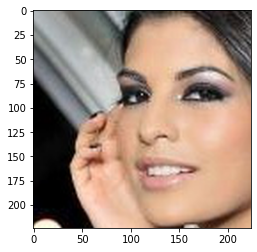

./faces/faces00.jpg =======> 여


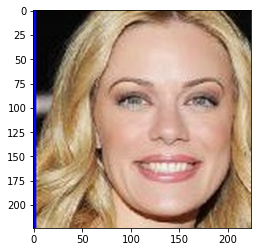

./faces/faces_00.jpg =======> 여


['./faces/faces00.jpg', './faces/faces_00.jpg']

In [48]:
from keras.models import load_model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

model = load_model('keras_model.h5')
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

from glob import glob
fileList=glob('./faces/*.jpg')

for i in fileList:
  img=Image.open(i)
  size=(224,224)
  img=ImageOps.fit(img, size, Image.ANTIALIAS)
  img_array=np.asarray(img)
  normalize_img_array=(img_array.astype(np.float32)/127.0)-1
  data[0]=normalize_img_array
  pred=model.predict(data)
  class_name=["남","여"]
  plt.imshow(img_array)
  plt.show()
  print(i,"=======>",class_name[np.argmax([pred])])

fileList

### 사진에 남/여 표시

In [50]:
from keras.models import load_model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

model = load_model('keras_model.h5')

def model_prn(imgArea):
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  image = Image.open(imgArea)
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  data[0] = normalized_image_array
  prediction=model.predict(data)

  class_name=['male', 'female']
  txt=class_name[np.argmax([prediction])]+"=>male:"+str(prediction[0][0]*100)+"/female:"+str(prediction[0][1]*100)
 
  return(txt)

In [59]:
import cv2


## haarcascade 불러오기
face_case = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## 이미지 불러오기
img=cv2.imread('/content/025548.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces=face_case.detectMultiScale(gray,1.3,5)


imgList=[]

for (x,y,w,h) in zip(faces,imgList):
  cv2.rectangle(img,(x-20,y-20),(x+w+20,y+h+20),(255,0,0),2)
  roi_color=img[y-20:y+h+20,x-20:w+
                h+20]
  
  cv2.imwrite("tmp.jpg", roi_color)
  pred=model_prn("tmp.jpg")
  imgList.append(pred)


imgList

['female=>male:2.609904110431671/female:97.39009141921997']

total count==> female:['female']


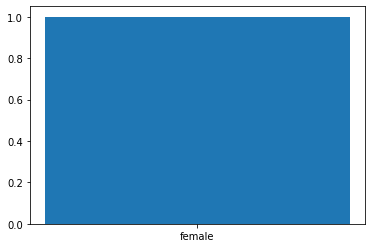

In [75]:
## 이미지속 남여 비율
gubun=[i.split("=>")[0] for i in imgList]
#gubun

re=np.unique(gubun,return_counts=True)
plt.bar(re[0],re[1])

txt=f"total count==> female:{re[0]}"
print(txt)

In [87]:
## opencv2 이미지 합성
img=cv2.imread('025548.jpg')

# 폰트 색상 지정
b=(255, 0, 0)
g=(0, 255, 0)
r=(0, 0, 255)
white=(255, 255, 255)
font=cv2.FONT_HERSHEY_PLAIN

#cv2를 이용한 이미지에 글자 삽입
img=cv2.putText(img, txt, (10, 30), font, 2, b, 1, cv2.LINE_AA)

cv2.imwrite('./tmp_txt.jpg',img)
#cv2.imshow('faces', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()




True

In [90]:
## opencv2 이미지 합성
img=cv2.imread('025548.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## 얼굴찾기
faces=face_case.detectMultiScale(gray, 1.3, 5)

# 폰트 색상 지정
b=(255, 0, 0)
g=(0, 255, 0)
r=(0, 0, 255)
white=(255, 255, 255)
font=cv2.FONT_HERSHEY_PLAIN

#cv2를 이용한 이미지에 글자 삽입
img=cv2.putText(img, txt, (10, 30), font, 2, b, 1, cv2.LINE_AA)

#cv2.imwrite('./tmp_txt.jpg', img)

#cv2.imshow('faces', img)
#cv2.waitKey(0)
#$cv2.destroyAllWindows()

for (x, y, w, h), result in zip(faces, gubun):
    cv2.rectangle(img, (x-20, y-20), (x+w+20, y+h+20), (255,0,0), 2) # 선 출력
    img=cv2.putText(img, result, (x, y-30), font, 2, b, 1, cv2.LINE_AA)
    
cv2.imwrite('tmp_line_txt.jpg', img)

True